In [1]:
# Importamos las bibliotecas necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import norm, skew

import warnings
warnings.filterwarnings(action="ignore")


target_name = 'SalePrice'
dataset_train_raw = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
dataset_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

dataset_train_raw 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [2]:
dataset_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


Vamos a unir los datos de entrenamiento y de pruebas, para preprocesarlos y luego dividirlos nuevamente. También vamos a eliminar datos que afectan nuestro modelo como el 'id' 

In [3]:
ignore_feature = ['Id']
y_train = dataset_train_raw[target_name]
dataset_train = dataset_train_raw.drop([target_name] + ignore_feature, axis=1, inplace=False)
dataset_test.drop(ignore_feature, axis=1, inplace=True)

all_data = pd.concat([dataset_train, dataset_test], axis=0, sort=False)
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


# Mapa decorrelaciones

Vemos que hay algo de milticolaneidad, pero esto lo vamos a solucionar mediante los modelos de penalización.

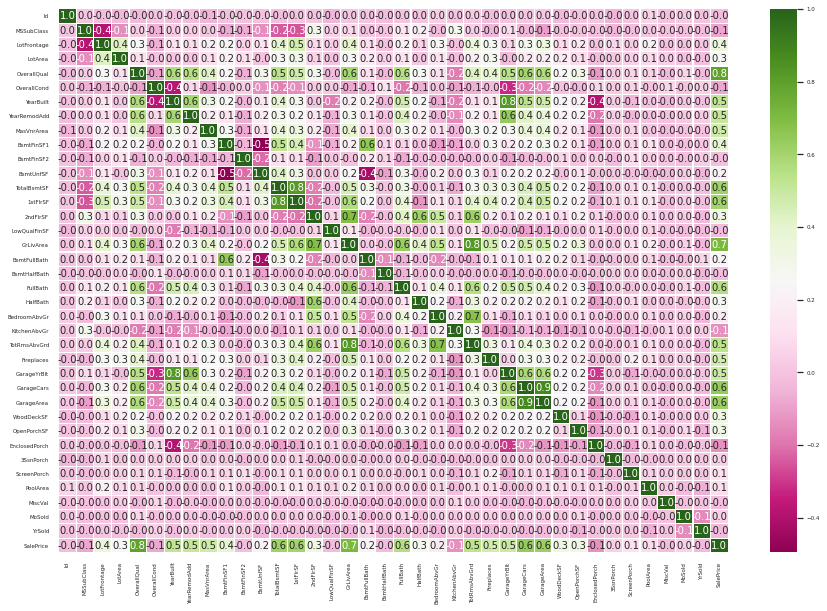

In [4]:
correlation_train = dataset_train_raw.corr()
sb.set(font_scale=0.5)
plt.figure(figsize=(15, 10))
ax = sb.heatmap(correlation_train, annot=True, annot_kws={'size': 10}, fmt='.1f', cmap='PiYG', linewidths=.2)
plt.show()

# Vamos a tratar con los valores perdidos

Veremos que hay valores perdidos y para tratarlos vamos a hacer una categoria por separado

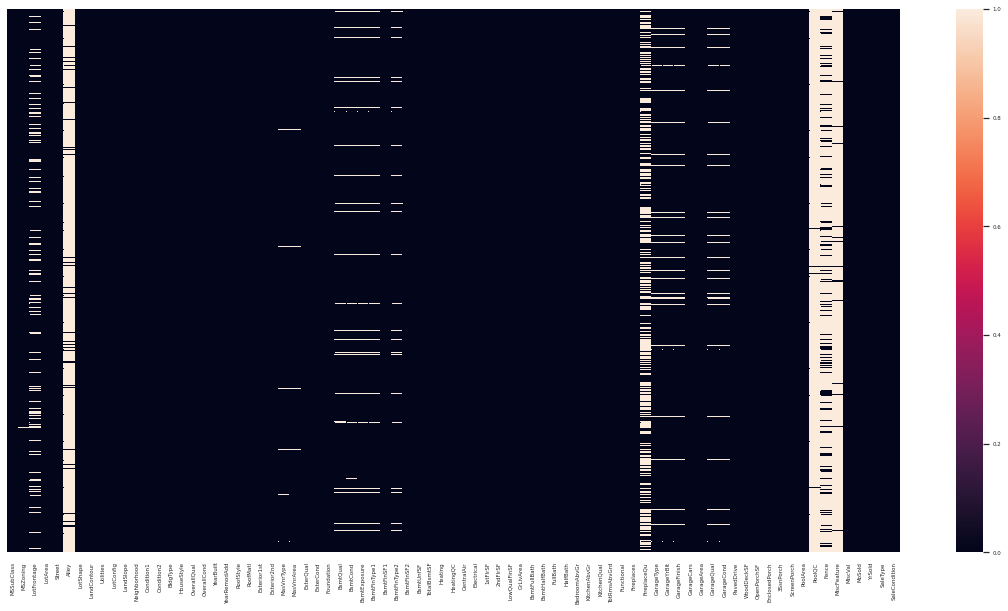

In [5]:
fig, ax = plt.subplots(figsize=(20, 10))
sb.heatmap(all_data.isnull(), yticklabels=False, cbar=True)
plt.show()

In [6]:
# Aquí si la caracteristica que falta es númerica, rellenela con un cero

specially_missed = ['Alley',
                    'PoolQC',
                    'MiscFeature',
                    'Fence',
                    'FireplaceQu',
                    'GarageType',
                    'GarageFinish',
                    'GarageQual',
                    'GarageCond',
                    'BsmtQual',
                    'BsmtCond',
                    'BsmtExposure',
                    'BsmtFinType1',
                    'BsmtFinType2',
                    'MasVnrType']

for feature in specially_missed:
    all_data[feature] = all_data[feature].fillna('None')

In [7]:
# Características numéricas importantes que toman una pequeña cantidad de variantes de valores (por ejemplo, año) 
# en categóricas al convertirlas en cadenas.

numeric_missed = ['BsmtFinSF1',
                  'BsmtFinSF2',
                  'BsmtUnfSF',
                  'TotalBsmtSF',
                  'BsmtFullBath',
                  'BsmtHalfBath',
                  'GarageYrBlt',
                  'GarageArea',
                  'GarageCars',
                  'MasVnrArea']

for feature in numeric_missed:
    all_data[feature] = all_data[feature].fillna(0)

In [8]:
# Complete los valores restantes que faltan con los valores más comunes para esta función.

all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [9]:
all_data['Functional'] = all_data['Functional'].fillna('Typ')
all_data['Utilities'] = all_data['Utilities'].fillna('AllPub')
all_data['KitchenQual'] = all_data['KitchenQual'].fillna('TA')
all_data['Electrical'] = all_data['Electrical'].fillna('SBrkr')

all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
all_data['MSZoning'] = all_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

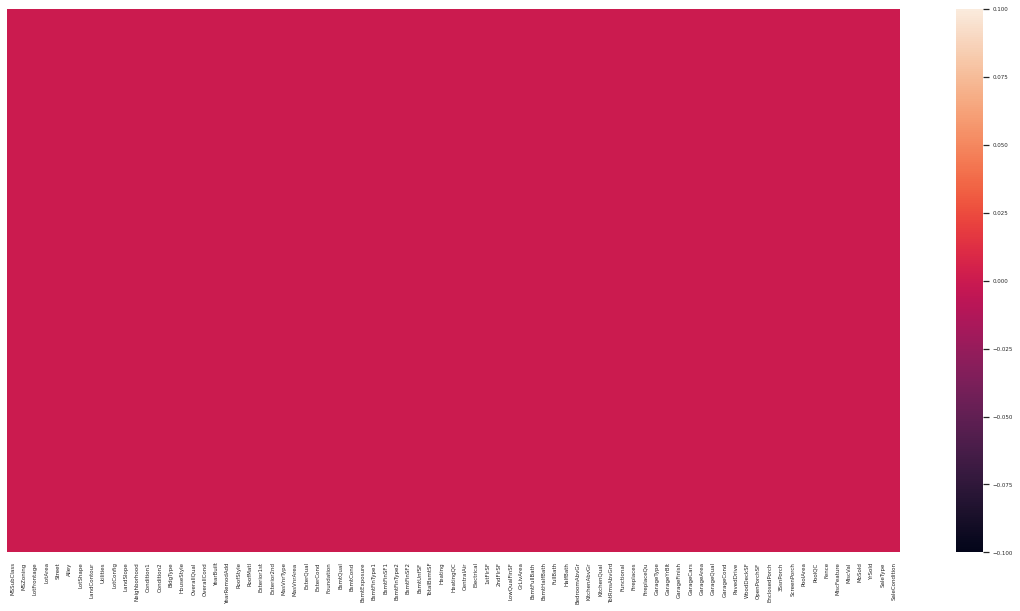

In [10]:
# Ahora podemos ver que ya no hay valores perdidos

fig, ax = plt.subplots(figsize=(20, 10))
sb.heatmap(all_data.isnull(), yticklabels=False, cbar=True)
plt.show()

# Arreglar la asimetría

Creemos un histograma para ver si la variable objetivo (precio de venta) se distribuye normalmente.

Y no, no es así, ahora usaremos log. 

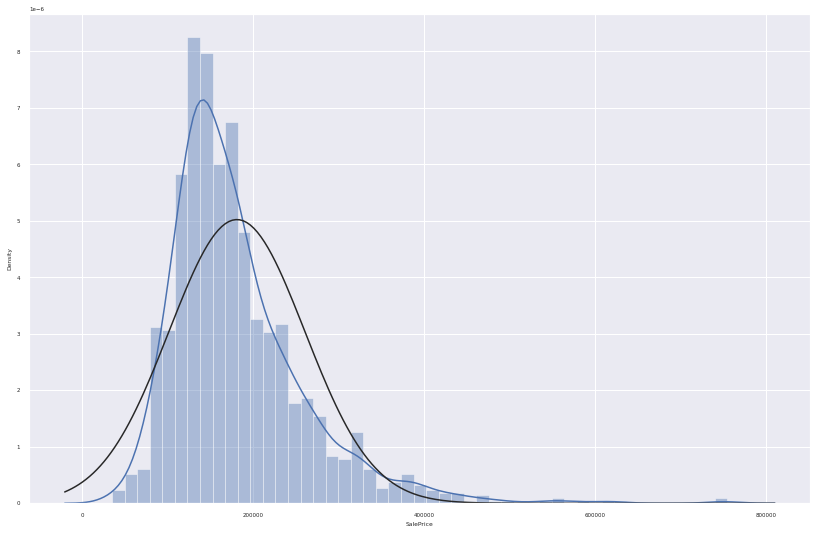

In [11]:
plt.subplots(figsize=(14, 9))
sb.distplot(y_train, kde=True, hist=True, fit=norm)
plt.show()

In [12]:
# Ahora vamos a reparar la simetría del resto de los valores

numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_feats[abs(skewed_feats) > 0.5]
high_skew

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
MasVnrArea        2.613592
OpenPorchSF       2.535114
WoodDeckSF        1.842433
1stFlrSF          1.469604
LotFrontage       1.460429
BsmtFinSF1        1.425230
GrLivArea         1.269358
TotalBsmtSF       1.156894
BsmtUnfSF         0.919339
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
OverallCond       0.570312
YearBuilt        -0.599806
GarageYrBlt      -3.906205
dtype: float64

In [13]:
for feature in high_skew.index:
    all_data[feature] = np.log1p(all_data[feature])

# Añadiendo nuevas funciones

Agregando nuevas características más significativas basadas en características menores antiguas

In [14]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

all_data['SqFtPerRoom'] = all_data['GrLivArea'] / (all_data['TotRmsAbvGrd'] + all_data['FullBath'] +
                                                       all_data['HalfBath'] + all_data['KitchenAbvGr'])

all_data['TotalHomeQuality'] = all_data['OverallQual'] + all_data['OverallCond']

all_data['TotalBathrooms'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) +
                                  all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))

# Conjunto de datos procesados 

In [15]:
X_all = pd.get_dummies(all_data)
X_train = X_all[:len(y_train)]
X_test = X_all[len(y_train):]

X_train

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,7,1.791759,7.602900,2003,5.283204,6.561031,0.000000,5.017280,...,0,0,0,1,0,0,0,0,1,0
1,4.394449,9.169623,6,2.197225,7.589336,1976,0.000000,6.886532,0.000000,5.652489,...,0,0,0,1,0,0,0,0,1,0
2,4.234107,9.328212,7,1.791759,7.601902,2002,5.093750,6.188264,0.000000,6.075346,...,0,0,0,1,0,0,0,0,1,0
3,4.110874,9.164401,7,1.791759,7.557995,1970,0.000000,5.379897,0.000000,6.293419,...,0,0,0,1,1,0,0,0,0,0
4,4.442651,9.565284,8,1.791759,7.601402,2000,5.860786,6.486161,0.000000,6.196444,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.143135,8.976894,6,1.791759,7.600902,2000,0.000000,0.000000,0.000000,6.860664,...,0,0,0,1,0,0,0,0,1,0
1456,4.454347,9.486152,6,1.945910,7.590347,1988,4.787492,6.673298,5.099866,6.380123,...,0,0,0,1,0,0,0,0,1,0
1457,4.204693,9.109746,7,2.302585,7.571474,2006,0.000000,5.620401,0.000000,6.777647,...,0,0,0,1,0,0,0,0,1,0
1458,4.234107,9.181735,5,1.945910,7.576097,1996,0.000000,3.912023,6.937314,0.000000,...,0,0,0,1,0,0,0,0,1,0


In [16]:
X_test

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.394449,9.360741,5,1.945910,7.581720,1961,0.000000,6.150603,4.976734,5.602119,...,0,0,0,1,0,0,0,0,1,0
1,4.406719,9.565775,6,1.945910,7.580189,1958,4.691348,6.828712,0.000000,6.008813,...,0,0,0,1,0,0,0,0,1,0
2,4.317488,9.534668,5,1.791759,7.599902,1998,0.000000,6.674561,0.000000,4.927254,...,0,0,0,1,0,0,0,0,1,0
3,4.369448,9.208238,6,1.945910,7.600402,1998,3.044522,6.401917,0.000000,5.783825,...,0,0,0,1,0,0,0,0,1,0
4,3.784190,8.518392,8,1.791759,7.597396,1992,0.000000,5.575949,0.000000,6.925595,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3.091042,7.568896,4,2.079442,7.586296,1970,0.000000,0.000000,0.000000,6.304449,...,0,0,0,1,0,0,0,0,1,0
1455,3.091042,7.546974,4,1.791759,7.586296,1970,0.000000,5.533389,0.000000,5.686975,...,0,0,0,1,1,0,0,0,0,0
1456,5.081404,9.903538,5,2.079442,7.581210,1996,0.000000,7.110696,0.000000,0.000000,...,0,0,0,1,1,0,0,0,0,0
1457,4.143135,9.253591,5,1.791759,7.597396,1992,0.000000,5.823046,0.000000,6.356108,...,0,0,0,1,0,0,0,0,1,0


In [17]:
X_all

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,7,1.791759,7.602900,2003,5.283204,6.561031,0.0,5.017280,...,0,0,0,1,0,0,0,0,1,0
1,4.394449,9.169623,6,2.197225,7.589336,1976,0.000000,6.886532,0.0,5.652489,...,0,0,0,1,0,0,0,0,1,0
2,4.234107,9.328212,7,1.791759,7.601902,2002,5.093750,6.188264,0.0,6.075346,...,0,0,0,1,0,0,0,0,1,0
3,4.110874,9.164401,7,1.791759,7.557995,1970,0.000000,5.379897,0.0,6.293419,...,0,0,0,1,1,0,0,0,0,0
4,4.442651,9.565284,8,1.791759,7.601402,2000,5.860786,6.486161,0.0,6.196444,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3.091042,7.568896,4,2.079442,7.586296,1970,0.000000,0.000000,0.0,6.304449,...,0,0,0,1,0,0,0,0,1,0
1455,3.091042,7.546974,4,1.791759,7.586296,1970,0.000000,5.533389,0.0,5.686975,...,0,0,0,1,1,0,0,0,0,0
1456,5.081404,9.903538,5,2.079442,7.581210,1996,0.000000,7.110696,0.0,0.000000,...,0,0,0,1,1,0,0,0,0,0
1457,4.143135,9.253591,5,1.791759,7.597396,1992,0.000000,5.823046,0.0,6.356108,...,0,0,0,1,0,0,0,0,1,0


# Modelado 

In [18]:
import xgboost as xg
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from mlxtend.regressor import StackingRegressor


kf = KFold(n_splits=8, random_state=42, shuffle=True)

def cv_rmse(model):
    return -cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=kf)

models = ['Linear', 'SVR', 'Random_Forest', 'XGBR', 'Cat_Boost', 'Ridge', 'Elastic_Net', 'Lasso', 'Stack']
scores = []

lin = LinearRegression()
score_lin = cv_rmse(lin)
scores.append(score_lin.mean())

svr = SVR()
score_svr = cv_rmse(svr)
scores.append(score_svr.mean())

rfr = RandomForestRegressor()
score_rfr = cv_rmse(rfr)
scores.append(score_rfr.mean())

xgb = xg.XGBRegressor()
score_xgb = cv_rmse(xgb)
scores.append(score_xgb.mean())

catb = CatBoostRegressor(verbose=0, allow_writing_files=False)
score_catb = cv_rmse(catb)
scores.append(score_catb.mean())

rid = Ridge()
score_rid = cv_rmse(rid)
scores.append(score_rid.mean())

el = ElasticNet()
score_el = cv_rmse(el)
scores.append(score_el.mean())

las = Lasso()
score_las = cv_rmse(las)
scores.append(score_las.mean())

stack_gen = StackingRegressor(regressors=(CatBoostRegressor(verbose=0, allow_writing_files=False),
                                          Ridge(),
                                          xg.XGBRegressor(),
                                          RandomForestRegressor()),
                              meta_regressor=CatBoostRegressor(verbose=0, allow_writing_files=False),
                              use_features_in_secondary=True)
score_stack_gen = cv_rmse(stack_gen)
scores.append(score_stack_gen.mean())

cv_score = pd.DataFrame(models, columns=['Regressors'])
cv_score['RMSE_mean'] = scores
cv_score

,Regressors,RMSE_mean
0,Linear,44440.523614
1,SVR,81042.035686
2,Random_Forest,29128.916178
3,XGBR,31657.187358
4,Cat_Boost,25639.765845
5,Ridge,31693.656745
6,Elastic_Net,35852.826186
7,Lasso,33425.519584
8,Stack,27435.654693


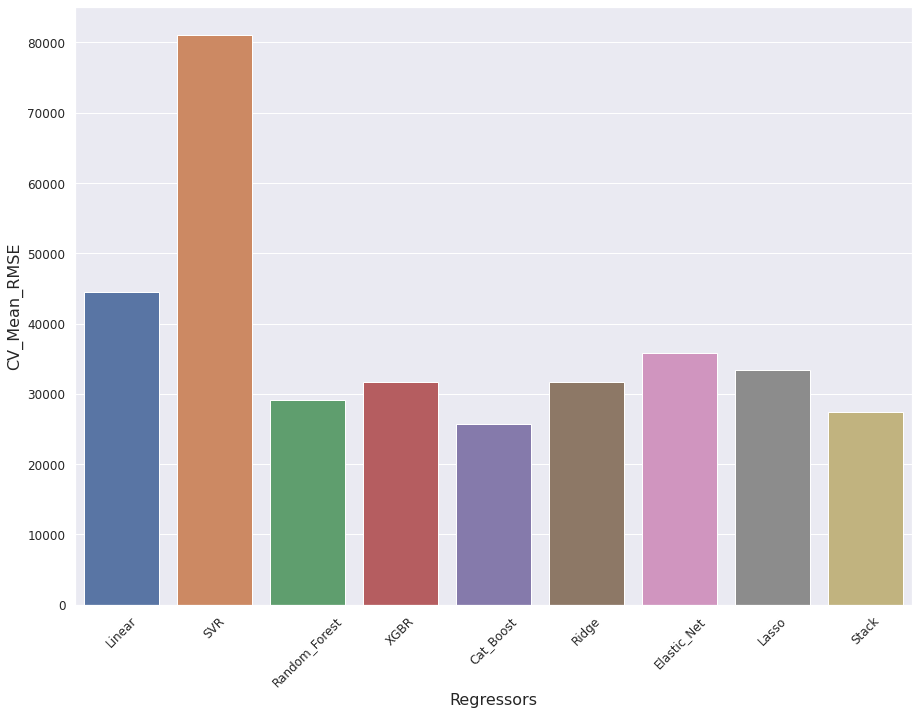

In [19]:
plt.figure(figsize=(15, 11))
sb.barplot(cv_score['Regressors'], cv_score['RMSE_mean'])
plt.xlabel('Regressors', fontsize=16)
plt.ylabel('CV_Mean_RMSE', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [20]:
predictions = {}

def xgbr(X_train, y_train, X_test):
    xgbrM = xg.XGBRegressor()
    params = {'max_depth': [3, 4, 5, 6, 7, 8],
              'min_child_weight': [0, 4, 5, 6, 7, 8],
              'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.25, 0.8, 1],
              'n_estimators': [10, 30, 50, 100, 200, 400, 1000]}

    grid_search_xg = RandomizedSearchCV(estimator=xgbrM, scoring='neg_root_mean_squared_error', param_distributions=params, n_iter=200, cv=4, verbose=2,
                                         random_state=42, n_jobs=-1)
    grid_search_xg.fit(X_train, y_train)
    xgbrModel = grid_search_xg.best_estimator_
    print('Best params(XGBR):',grid_search_xg.best_params_)
    print('RMSE(XGBR):', -grid_search_xg.best_score_)
    return xgbrModel

#xgbrModel = xgbr(X_train, y_train, X_test)
xgbrModel = xg.XGBRegressor(n_estimators=400, min_child_weight=5, max_depth=7, learning_rate=0.05)
xgbrModel.fit(X_train, y_train)
predictions['XGBR'] = xgbrModel.predict(X_test)

In [21]:
def ridge(X_train, y_train, X_test):
    alpha_ridge = {'alpha': [-3, -2, -1, 1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 0.5, 1, 1.5, 2, 3, 4, 5, 10, 20, 30, 40]}

    rd = Ridge()
    grid_search_rd = GridSearchCV(estimator=rd, scoring='neg_root_mean_squared_error', param_grid=alpha_ridge, cv=4, n_jobs=-1, verbose=3)
    grid_search_rd.fit(X_train, y_train)
    ridgeModel = grid_search_rd.best_estimator_
    print('Best params(Ridge):', grid_search_rd.best_params_)
    print('RMSE(Ridge):', -grid_search_rd.best_score_)
    return ridgeModel

#ridgeModel = ridge(X_train, y_train, X_test)
ridgeModel = Ridge(alpha=10)
ridgeModel.fit(X_train, y_train)
predictions['Ridge'] = ridgeModel.predict(X_test)

In [22]:
def catBoost(X_train, y_train, X_test):
    catM = CatBoostRegressor(verbose=0, allow_writing_files=False)
    params = {'learning_rate': [0.01, 0.05, 0.005, 0.0005],
              'depth': [4, 6, 10],
              'l2_leaf_reg': [1, 2, 3, 5, 9]}

    grid_search_cat = RandomizedSearchCV(estimator=catM, scoring='neg_root_mean_squared_error', param_distributions=params, n_iter=10, cv=4, verbose=2,
                                     random_state=42, n_jobs=-1)
    grid_search_cat.fit(X_train, y_train)
    catModel = grid_search_cat.best_estimator_
    print('Best params(CatBoost):',grid_search_cat.best_params_)
    print('RMSE(CatBoost):', -grid_search_cat.best_score_)
    return catModel

#catModel = catBoost(X_train, y_train, X_test)
catModel = CatBoostRegressor(verbose=0, allow_writing_files=False, learning_rate=0.05, l2_leaf_reg=2, depth=4)
catModel.fit(X_train, y_train)
predictions['CatBoost'] = catModel.predict(X_test)

In [23]:
final_prediction = 0.25 * predictions['XGBR'] + 0.35 * predictions['CatBoost'] + 0.4 * predictions['Ridge']

In [24]:
result = pd.DataFrame([len(y_train) + 1 + i for i in range(len(X_test))], columns=['Id'])
result[target_name] = np.expm1(final_prediction)
result.to_csv('result.csv', index=False, header=True)
result

,Id,SalePrice
0,1461,inf
1,1462,inf
2,1463,inf
3,1464,inf
4,1465,inf
...,...,...
1454,2915,inf
1455,2916,inf
1456,2917,inf
1457,2918,inf
